In [1]:
# load laibries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import calendar
from plotly.offline import iplot

# 1. Data Preprocessing

In [2]:
# Read dataset file
df_temp = pd.read_csv("../data/temperatures.csv")

In [ ]:
df_temp.head(5)
df_temp.shape
df_temp.Year.unique()


In [ ]:
# 
df_regions = df_temp.groupby('Region').nunique()
df_regions  


In [3]:
#Dropping duplicate rows 
df_temp = df_temp.drop_duplicates()
df_temp.shape

(2885612, 8)

In [ ]:
# check missing values (Nan) in every column
for col in df_temp.columns:
    print("The " + col + " contains NaN" + ":" + str((df_temp[col].isna().any())))

In [ ]:
# check missing values (Zeros) in every column
for col in df_temp.columns:
    print("The " + col + " contains 0" + ":" + str((df_temp[col] == 0 ).any()))

In [4]:
# drop rows with zero value in Day column 
df_temp = df_temp[df_temp.Day != 0]
# drop rows with 200 and 201 value in Year column
df_temp = df_temp[(df_temp.Year != 200) & (df_temp.Year != 201)]
# drop  rows with -99 value in Avgtemperature column 
df_temp = df_temp[df_temp.AvgTemperature != -99]
df_temp.shape

(2806369, 8)

# 2. Data Analysis
## 2.1. Les températures moyennes françaises de 1995 à 2019



In [5]:
# Groupby country = France
df_france = df_temp.groupby("Country").get_group("France")
# Groupby AvgTemperature per Year 
df_france_year_temp = df_france.query("Year<2020").groupby("Year")["AvgTemperature"].mean()


Text(0.5, 1.0, 'France')

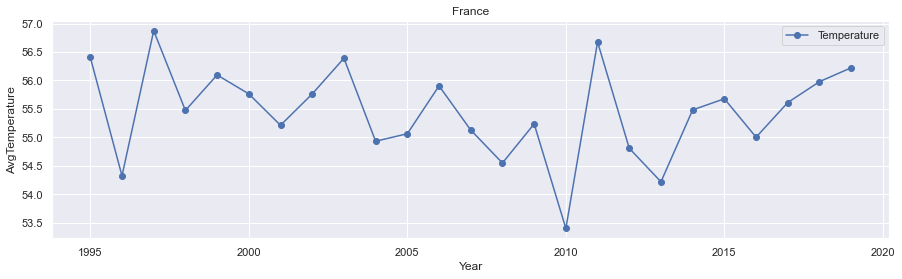

In [6]:
# display graph with seaborn
sns.set()
    
x = df_france_year_temp.index
y = df_france_year_temp 

plt.figure(figsize=(15,4))
plt.plot(x, y, marker="o", label="Temperature")
plt.xlabel("Year")
plt.ylabel("AvgTemperature")
plt.legend()

plt.title("France")

## 2.2. L'évolution moyenne de la témparature chaque mois de l'année de chaque région

In [7]:
# GroupBy Region 
df_africa = df_temp.groupby("Region").get_group("Africa")
df_asia = df_temp.groupby("Region").get_group("Asia")
df_south_pacific = df_temp.groupby("Region").get_group("Australia/South Pacific")
df_europe = df_temp.groupby("Region").get_group("Europe")
df_middle_east = df_temp.groupby("Region").get_group("Middle East")
df_north_america = df_temp.groupby("Region").get_group("North America")
df_arribean = df_temp.groupby("Region").get_group("South/Central America & Carribean")

In [8]:
# groupBy AngTemperature per Month for each Region 
df_africa_monthly_temp = df_africa.query("Year<2020").groupby("Month")["AvgTemperature"].mean()
df_asia_monthly_temp = df_asia.query("Year<2020").groupby("Month")["AvgTemperature"].mean()
df_south_pacific_monthly_temp = df_south_pacific.query("Year<2020").groupby("Month")["AvgTemperature"].mean()
df_europe_monthly_temp = df_europe.query("Year<2020").groupby("Month")["AvgTemperature"].mean()
df_middle_east_monthly_temp = df_middle_east.query("Year<2020").groupby("Month")["AvgTemperature"].mean()
df_north_america_monthly_temp = df_north_america.query("Year<2020").groupby("Month")["AvgTemperature"].mean()
df_arribean_monthly_temp = df_arribean.query("Year<2020").groupby("Month")["AvgTemperature"].mean()


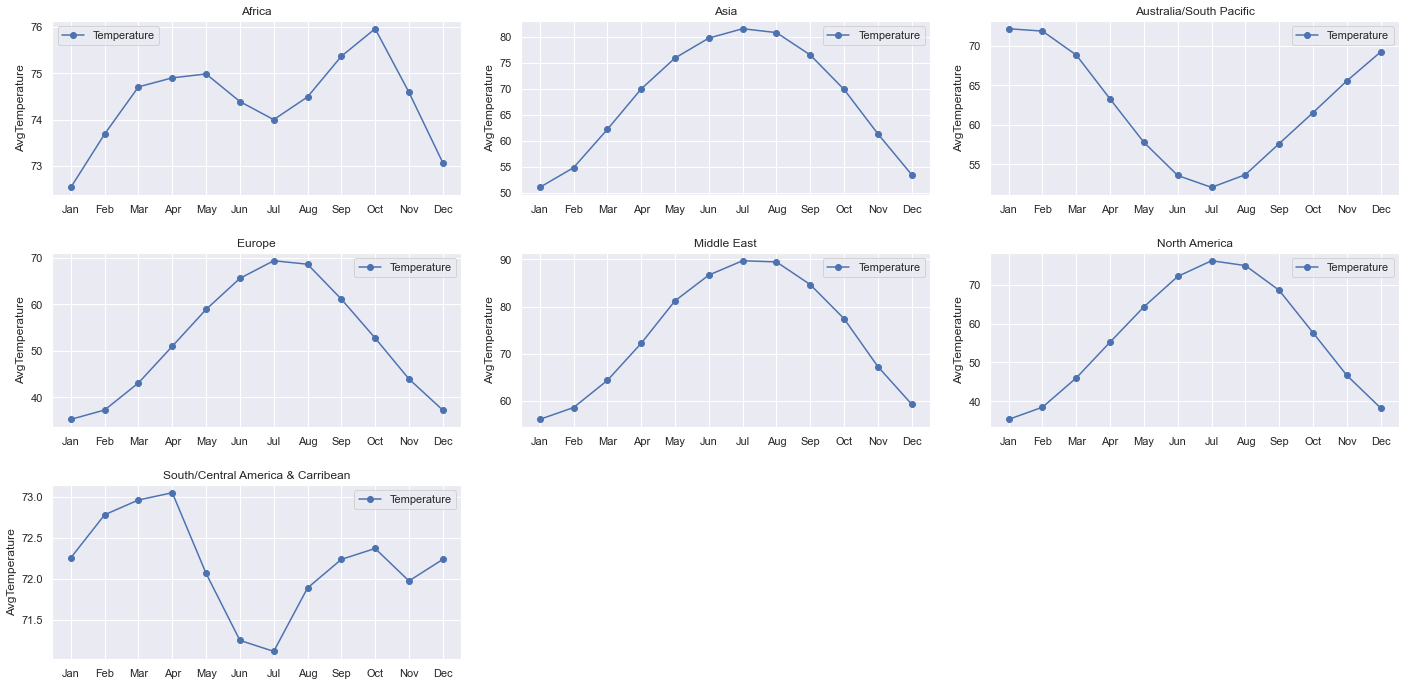

In [9]:
# display graph with seaborn
sns.set()
x_africa = [] 
regions = df_temp.Region.unique() 
x1 = df_africa_monthly_temp
x1 = x1.index
for month in x1:
    x_africa.append((calendar.month_name[month])[:3])

y_africa = df_africa_monthly_temp
y_asia = df_asia_monthly_temp
y_south_pacific = df_south_pacific_monthly_temp
y_europe = df_europe_monthly_temp
y_middle_east = df_middle_east_monthly_temp
y_north_america = df_north_america_monthly_temp
y_arribean = df_arribean_monthly_temp
region_monthly_temp = [y_africa, y_asia, y_south_pacific, y_europe, y_middle_east, y_north_america, y_arribean]

plt.figure(figsize=(20,10))

for n, region in enumerate(region_monthly_temp):
    plt.subplot(3,3,n+1)

    plt.plot(x_africa, region, marker="o", label="Temperature")
    # plt.xlabel("Month")
    plt.ylabel("AvgTemperature")
    plt.legend()
    plt.title(regions[n])
    plt.tight_layout(pad=2.0)

## 2.3. Le classement graphique des pays les plus chauds au monde

In [10]:
# Load codes of countries 
df_codes = pd.read_csv("../data/wikipedia-iso-country-codes.csv")
# Change index to name of contries
df_codes = df_codes.set_index("English short name lower case")
# Change some  contries name  in df_codes to become the same as our data frame index 
df_codes = df_codes.rename(index = {"United States Of America":"US","Côte d'Ivoire":"Ivory Coast","Korea, Republic of (South Korea)":"South Korea","Netherlands":"The Netherlands","Syrian Arab Republic":"Syria","Myanmar":"Myanmar (Burma)","Korea, Democratic People's Republic of":"North Korea","Macedonia, the former Yugoslav Republic of":"Macedonia","Ecuador":"Equador","Tanzania, United Republic of":"Tanzania","Serbia":"Serbia-Montenegro"})


<AxesSubplot:title={'center':'Top 10 des pays les plus chauds au monde'}, xlabel='Country'>

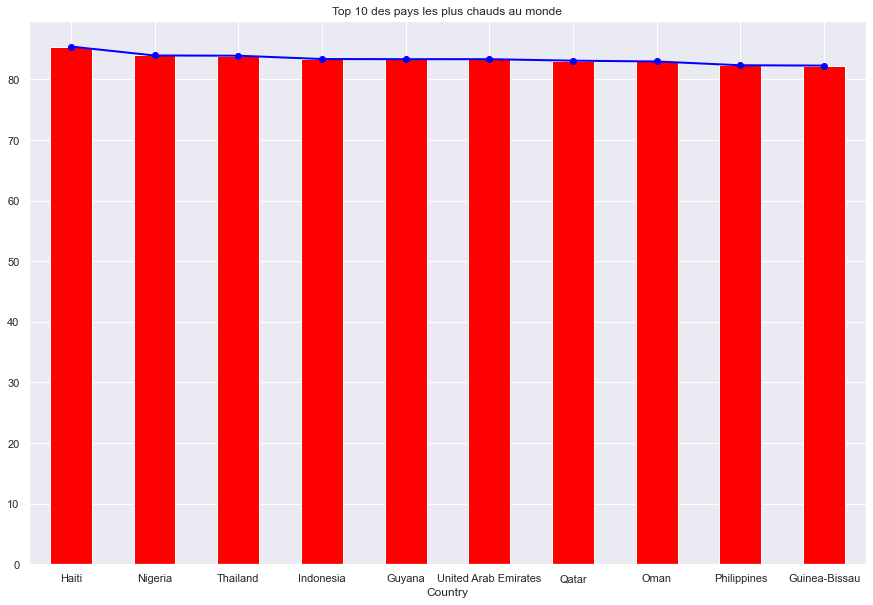

In [11]:
top_10_hottest_Countries = df_temp.query("Year<2020").groupby("Country").mean().sort_values(by = "AvgTemperature", ascending =False)[:10]
# display top_10 hottest using histogramme
plt.subplots(figsize=(15, 10))
top_10_hottest_Countries["AvgTemperature"].plot(kind='bar', stacked = True, color = "red", title = "Top 10 des pays les plus chauds au monde" )
top_10_hottest_Countries["AvgTemperature"].plot(kind = 'line', marker = 'o', color = 'blue',linewidth=2.0,)


In [12]:
# Display top_10 hottest using map 
top_10_hottest_Countries_map = pd.merge(top_10_hottest_Countries, df_codes, left_index= True, right_index= True, how = "left")

data = [dict(type = "choropleth",autocolorscale = False, locations=  top_10_hottest_Countries_map["Alpha-3 code"], z = top_10_hottest_Countries_map["AvgTemperature"] ,
              text = top_10_hottest_Countries_map.index, colorscale = "reds",colorbar = dict(title = "Temperture"))]  
layout = dict(title = "The Top 10 Hottest Countries Around The World",geo = dict(scope = "world",projection = dict(type = "equirectangular"),showlakes = True,lakecolor = "rgb(66,165,245)",),)    

fig = dict(data = data,layout=layout)
iplot(fig,filename = "d3-choropleth-map")

## 2.4. le classement graphique des pays les plus froids au monde

<AxesSubplot:title={'center':'Top 10 des pays les plus froids au monde'}, xlabel='Country'>

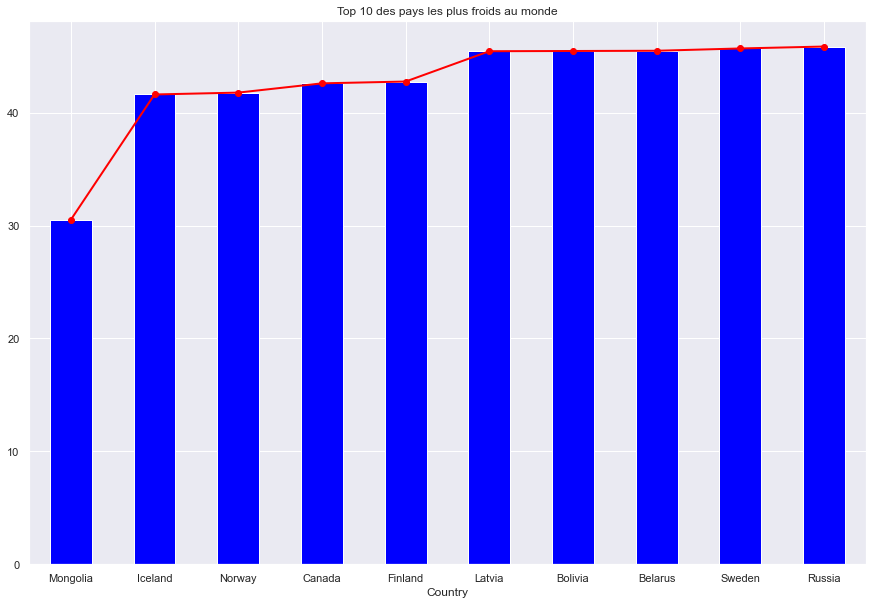

In [13]:
top_10_coldest_Countries = df_temp.query("Year<2020").groupby("Country").mean().sort_values(by = "AvgTemperature")[:10]
plt.subplots(figsize=(15, 10))
top_10_coldest_Countries["AvgTemperature"].plot(kind='bar', color = "blue", title = "Top 10 des pays les plus froids au monde" )
top_10_coldest_Countries["AvgTemperature"].plot(kind = 'line', marker = 'o', color = 'red',linewidth=2.0,)


In [14]:
# Display top_10 coldest using map 
top_10_coldest_Countries_map = pd.merge(top_10_coldest_Countries, df_codes, left_index= True, right_index= True, how = "left")

data = [dict(type = "choropleth",autocolorscale = False, locations=  top_10_coldest_Countries_map["Alpha-3 code"], z = top_10_coldest_Countries_map["AvgTemperature"] ,
              text = top_10_coldest_Countries_map.index, colorscale = "blues",colorbar = dict(title = "Temperture"))]  
layout = dict(title = "The Top 10 Coldest Countries Around The World",geo = dict(scope = "world",projection = dict(type = "equirectangular"),showlakes = True,lakecolor = "rgb(30,144,255)",),)    

fig = dict(data = data,layout=layout)
iplot(fig,filename = "d3-choropleth-map")

## 2.5. L'évolution des températures entre le pays le plus chaud et le pays le plus froid de 1995 à 2019 

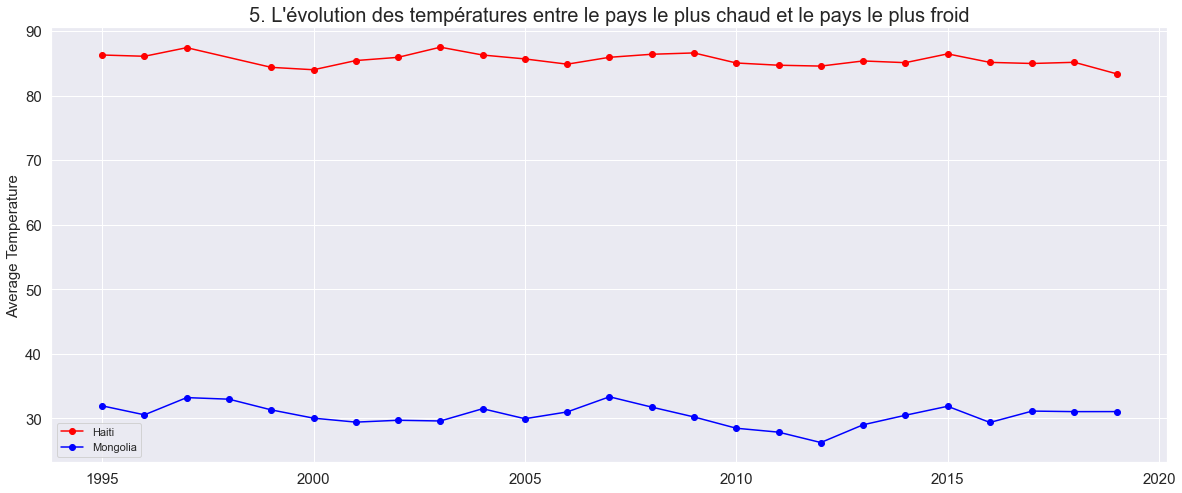

In [39]:
# Getting the first element from top 10 hottest countries
hottest_Country = top_10_hottest_Countries.loc[top_10_hottest_Countries['AvgTemperature'] == top_10_hottest_Countries['AvgTemperature'].max()].filter(['Country']).reset_index()
coldest_Country = top_10_coldest_Countries.loc[top_10_coldest_Countries['AvgTemperature'] == top_10_coldest_Countries['AvgTemperature'].min()].filter(['Country']).reset_index()


# Groupby country = hottest
df_hottest_Country = df_temp.groupby("Country").get_group(hottest_Country.loc[0,'Country'])
# Groupby AvgTemperature per Year 
df_hottest_Country_year_temp = df_hottest_Country.query("Year<2020").groupby("Year")["AvgTemperature"].mean()

# Groupby country = coldest
df_coldest_Country = df_temp.groupby("Country").get_group(coldest_Country.loc[0,'Country'])
# Groupby AvgTemperature per Year 
df_coldest_Country_year_temp = df_coldest_Country.query("Year<2020").groupby("Year")["AvgTemperature"].mean()


#display hottest and coldest country in the same graphe

plt.figure(figsize = (20,8))
plt.plot(df_hottest_Country_year_temp.index, df_hottest_Country_year_temp, marker="o", label = hottest_Country.loc[0,'Country'], color ='red')
plt.plot(df_coldest_Country_year_temp.index, df_coldest_Country_year_temp, marker="o", label = coldest_Country.loc[0,'Country'], color ='blue')
plt.legend()
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.ylabel("Average Temperature",size = 15)
plt.title("5. L'évolution des températures entre le pays le plus chaud et le pays le plus froid",size = 20)
plt.show()


## 2.6. L'évolution de la température moyenne de la ville de Paris.

Text(0.5, 1.0, "6. L'évolution de la température moyenne de la ville de Paris")

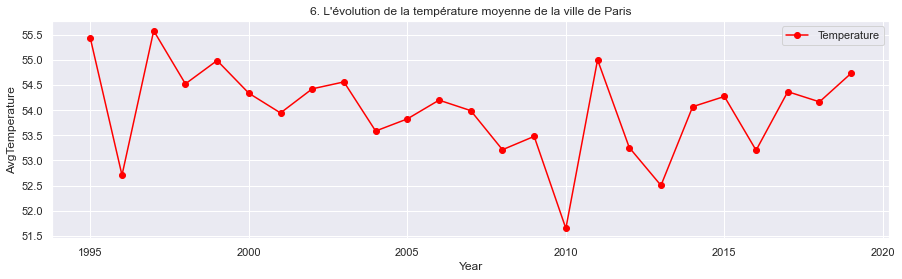

In [50]:
df_Paris_avg_temp = df_france.groupby("City").get_group("Paris")
df_Paris_avg_temp = df_Paris_avg_temp.query("Year < 2020").groupby("Year")["AvgTemperature"].mean()
# display graph with seaborn
sns.set()
    
x_paris = df_Paris_avg_temp.index
y_paris = df_Paris_avg_temp 

plt.figure(figsize=(15,4))
plt.plot(x_paris, y_paris, marker="o", label="Temperature", color = 'red')
plt.xlabel("Year")
plt.ylabel("AvgTemperature")
plt.legend()

plt.title("6. L'évolution de la température moyenne de la ville de Paris")

## 2.6. La température moyenne de chaque pays sur une carte sur la période 2010-2019

In [67]:
# Filter temperature on periode 2010-2019
df_countries_year_temp = df_temp.query("Year<2020 and Year >=2010").groupby("Country")["AvgTemperature"].mean()
# Merge countries with codes 
df_countries_year_temp_map = pd.merge(df_countries_year_temp, df_codes, left_index= True, right_index= True, how = "left")
# Display data on map 
data_countries = [dict(type = "choropleth",autocolorscale = False, locations=  df_countries_year_temp_map["Alpha-3 code"], z = df_countries_year_temp_map["AvgTemperature"] ,
              text = df_countries_year_temp_map.index, colorscale = "rainbow",colorbar = dict(title = "Temperature"))]  

layout_countries= dict(title = "7. La température moyenne des pays du monde sur la période 2010-2019",geo = dict(scope = "world",projection = dict(type = "equirectangular"),showlakes = True))    

fig = dict(data = data_countries,layout=layout_countries)
iplot(fig,filename = "d3-choropleth-map")
